In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rc('figure',figsize=(12,5))
plt.style.use('seaborn-whitegrid')

In [35]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [36]:
df = pd.read_csv('weight-height.csv')

In [37]:
df.shape

(10000, 3)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [39]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [40]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

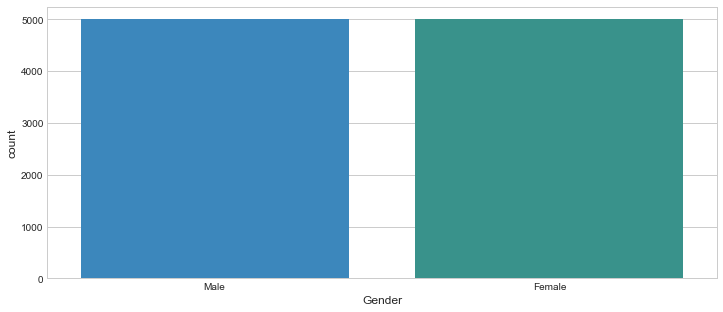

In [41]:
sns.countplot(x="Gender",data=df)

In [48]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

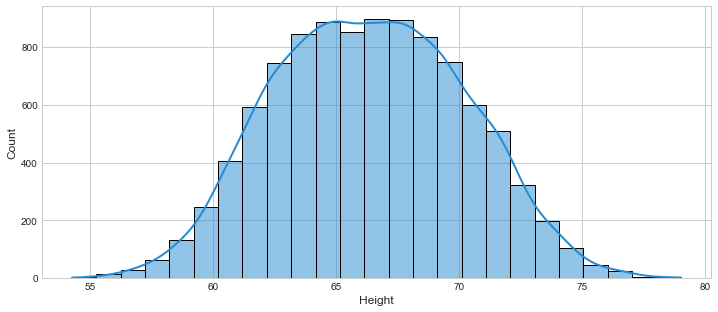

In [46]:
sns.histplot(x='Height',data=df, bins=25,kde=True)

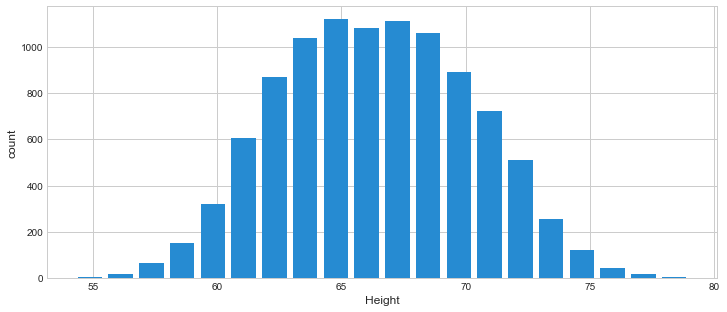

In [43]:
plt.hist(df.Height, bins=20, rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("count")
plt.show()

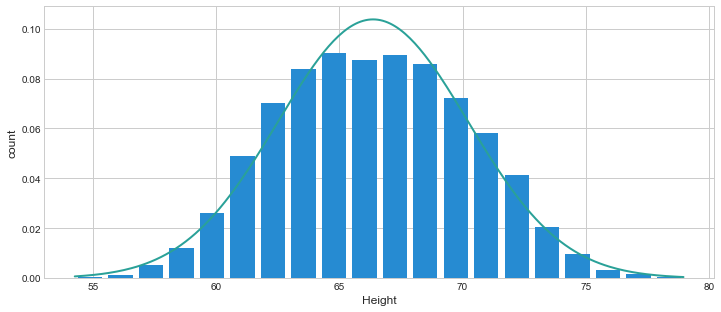

In [53]:
# drawing bell curve using matplotlib and scipy
from scipy.stats import norm
plt.hist(df.Height, bins=20, rwidth=0.8,density=True)
plt.xlabel("Height")
plt.ylabel("count")
range_height = np.arange(df.Height.min(),df.Height.max(),0.1)
plt.plot(range_height, norm.pdf(range_height,df.Height.mean(),df.Height.std()))
plt.show()

## FACTS:
- 68% of values are within 1 standard deviation of the mean.
- 95% of values are within 2 standard deviations of the mean
- 99.7% of values are within 3 standard deviations of the mean
- The values beyond 3 STD are outliers



In [54]:
upper_limit = df.Height.mean()+3*df.Height.std()
upper_limit

77.91014411714076

In [55]:
lower_limit = df.Height.mean() - 3*df.Height.std()
lower_limit

54.82497539250136

In [60]:
#let's see the values beyond upper_limit and lower_limit:
df[df.Height<lower_limit]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [61]:
df[df.Height>upper_limit]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783


### FACTS:
- it's possible that the outliers are valid. But having such variations will give us poor results.

In [62]:
# create a new dataframe removing these outliers
df2 = df[(df.Height<upper_limit)&(df.Height>lower_limit)]

In [65]:
# how many columns and rows are in new dataframe?
df2.shape

(9993, 3)

In [66]:
#how many rows are removed?
df.shape[0] - df2.shape[0]

7

In [64]:
df2.sample(10)

,Gender,Height,Weight
7141,Female,62.554584,135.665548
511,Male,73.536668,196.043295
4094,Male,73.379678,200.011263
105,Male,68.732988,179.204782
4203,Male,71.785616,192.550821
1664,Male,66.481597,165.589098
229,Male,71.848435,218.157469
7793,Female,68.254363,173.513344
5039,Female,60.631600,109.719696
9360,Female,61.912254,136.494215


## CALCULATE z-score:
A z-score tells us how many standard deviations away a value is from the mean. We use the following formula to calculate a z-score:<br>
<br>
Z-Score = (x – μ) / σ<br>
<br>
where:<br>
<br>
x: A raw data value <br>
μ: The mean of the dataset<br>
σ: The standard deviation of the dataset<br>
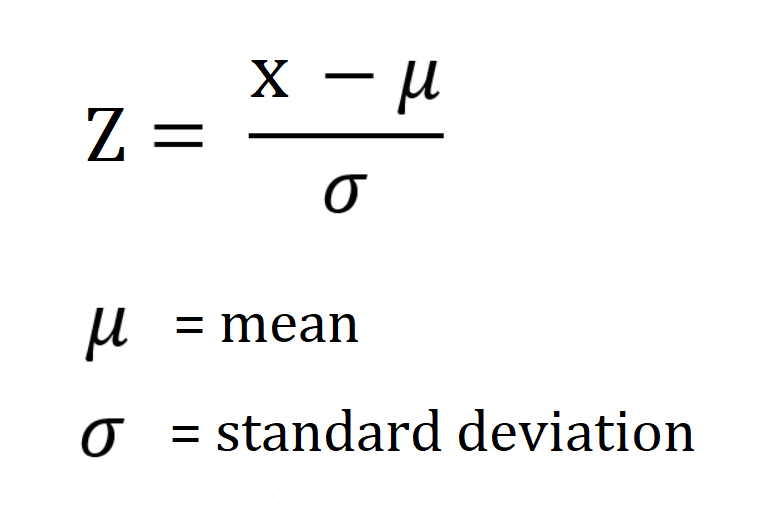
Z-score is measured in terms of standard deviations from the mean.<br> 
- If a Z-score is 0, it indicates that the data point's score is identical to the mean score.<br> 
- A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.<br> 
- Z-scores may be positive or negative, with a positive value indicating the score is above the mean and a negative score indicating it is below the mean.

In [67]:
df['z_score'] = (df.Height - df.Height.mean())/df.Height.std()

In [68]:
df.sample(5)

,Gender,Height,Weight,z_score
5394,Female,60.162510,94.232331,-1.612737
1550,Male,67.396020,180.659638,0.267304
6154,Female,63.979823,156.624550,-0.620590
2277,Male,66.622739,166.631749,0.066323
522,Male,68.923337,193.927360,0.664265


In [69]:
(60.162510 - 66.367560)/3.847528

-1.6127368013955974

In [70]:
df[df.z_score>3]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [71]:
df[df.z_score<-3]

,Gender,Height,Weight,z_score
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [76]:
# the values beyond +3 and -3 are outliers:
df[(df.z_score>3) | (df.z_score<-3)]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [82]:
# new dataframe removing outliers by z_score method
df_no_outlier = df[(df.z_score<3) & (df.z_score>-3)]

## FACTS:
we have considered the value +3 and -3 according to 3 Standard Deviation Criteria.

In [83]:
df_no_outlier.shape

(9993, 4)

In [84]:
df_no_outlier.sample(5)

,Gender,Height,Weight,z_score
1153,Male,69.013335,190.513514,0.687656
8435,Female,65.706580,149.715823,-0.171793
7932,Female,61.078218,116.431732,-1.374738
5180,Female,57.442567,104.486636,-2.319669
8997,Female,66.213286,173.382712,-0.040097


In [85]:
# how many outliers we removed?
df.shape[0] - df_no_outlier.shape[0]

7

<AxesSubplot:xlabel='Height', ylabel='Count'>

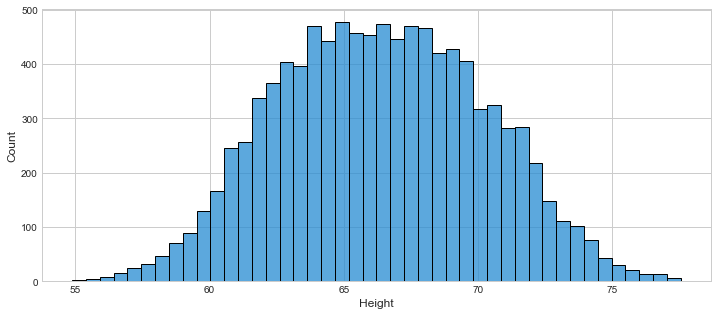

In [89]:
sns.histplot(x="Height", data = df_no_outlier)